**Question 1** : In the folowing definition of a probabilistic model:

$Y \sim \mathcal{N}(\mu, \sigma)$

$\mu \sim \mathcal{N}(0, 2)$

$\sigma \sim \mathcal{halfnormal}(0.75)$

1.1 - Identify the prior and the likelihood.

1.2  - How many parameters will the posterior have?

1.3 - Compare it with the model for the coin-flipping problem.

1.4 - Write Bayes' theorem for the model.


1.1. Identifying Prior and Likelihood

In the given probabilistic model:

$Y | \mu, \sigma \sim N(\mu, \sigma)$: This represents the likelihood. It describes the probability distribution of observing data point Y given the true mean (μ) and standard deviation (σ). It's a normal distribution with mean μ and standard deviation σ.
$\mu \sim N(0, 2)$: This represents the prior distribution for the mean (μ). It expresses our initial belief about the possible values of μ before observing any data. Here, it's a normal distribution with a mean of 0 and standard deviation of 2.
$\sigma \sim \text{halfnormal}(0.75)$: This is the prior distribution for the standard deviation (σ). It defines our prior knowledge about the possible values of σ. Here, it's a half-normal distribution with a scale parameter of 0.75 (enforcing non-negative values for σ).
1.2. Number of Parameters in the Posterior

The posterior distribution will have two parameters.

In this model, the posterior distribution represents the distribution of μ and σ after observing data Y. Since the likelihood depends on both μ and σ, and the priors for μ and σ are defined independently, the posterior will also depend on both μ and σ. Therefore, it will require two parameters to fully characterize it.

1.3. Comparison with Coin-Flipping Model

This model differs significantly from the coin-flipping problem in terms of:

Data Type:
This model deals with continuous data (Y) represented by a normal distribution.
The coin-flipping problem typically involves binary data (heads or tails) modeled by a Bernoulli distribution.
Parameters:
This model has two parameters (μ and σ) for the distribution of Y.
The coin-flipping model typically has one parameter (probability of heads) for the Bernoulli distribution.
Priors:
This model defines prior distributions for both μ and σ, incorporating our initial beliefs about the mean and standard deviation.
The coin-flipping problem might not require a prior if we have no initial preference for heads or tails (uniform prior).
In essence, this model is more complex, suitable for continuous data with unknown mean and standard deviation, while the coin-flipping model is simpler for binary data with a single parameter.

1.4 Bayes' Theorem for the Model

The posterior distribution, likelihood, and prior distributions for a specific model are represented using Bayes' theorem:

$$p(\mu, \sigma \mid Y) = \frac{p(Y \mid \mu, \sigma) \, p(\mu) \, p(\sigma)}{p(Y)}$$

where:

* $p(\mu, \sigma \mid Y)$: Posterior distribution
* $p(Y \mid \mu, \sigma)$: Likelihood
* $p(\mu)$: Prior distribution of $\mu$
* $p(\sigma)$: Prior distribution of $\sigma$
* $p(Y)$: Marginal likelihood (evidence)

For a specific model, the equation becomes:

$$p(\mu, \sigma \mid Y) = \frac{N(Y \mid \mu, \sigma) \cdot N(\mu \mid 0, 2) \cdot \text{halfnormal}(\sigma \mid 0.75)}{p(Y)}$$

Here, $N(Y \mid \mu, \sigma)$ represents a normal distribution with mean $\mu$ and standard deviation $\sigma$, and $\text{halfnormal}(\sigma \mid 0.75)$ represents a half-normal distribution with a scale parameter of 0.75.

The marginal likelihood, $p(Y)$, requires integration over both $\mu$ and $\sigma$:

$$p(Y) = \int_{\mu} \int_{\sigma} N(Y \mid \mu, \sigma) \cdot N(\mu \mid 0, 2) \cdot \text{halfnormal}(\sigma \mid 0.75) \, d\mu \, d\sigma$$

**Question 2**

Let’s suppose that we have two coins; when we toss the first coin, half of the time it lands on tails
 and half of the time on heads. The other coin is a loaded coin that always lands on heads. If we take
 one of the coins at random and get a head, what is the probability that this coin is the unfair one?

In [ ]:
Prob_head_fair=0.5
Prob_head_unfair=1
Prob_choosing_unfair=0.5
Prob_head=Prob_head_fair*(1-Prob_choosing_unfair)+Prob_head_unfair*(Prob_choosing_unfair)
Prob_choosing_unfair_given_that_head=(Prob_choosing_unfair*Prob_head_unfair)/Prob_head
print(Prob_choosing_unfair_given_that_head)


0.6666666666666666


**Question 3**


Using PyMC, change the parameters of the prior Beta distribution in `our_first_model` to match those of Week 2. Compare the results.

In [ ]:
# Setting up the dependencies: (DONOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

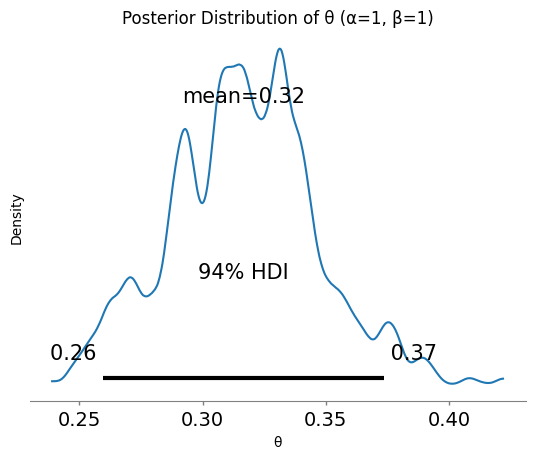

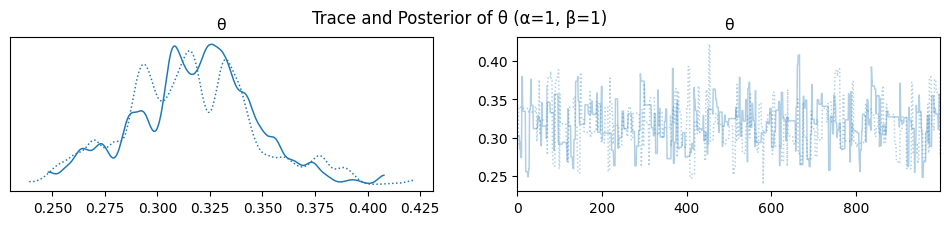

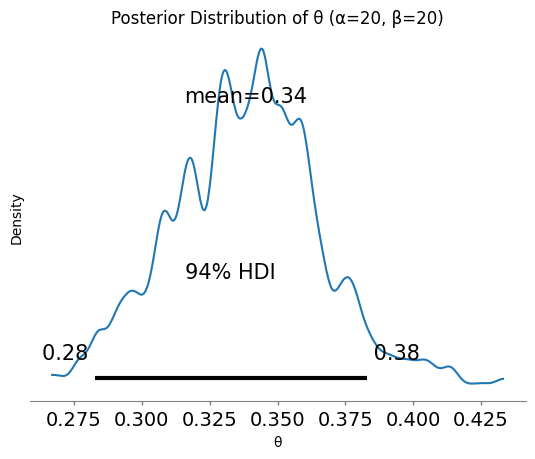

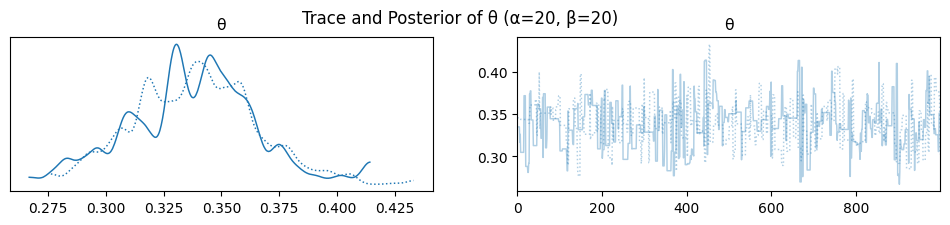

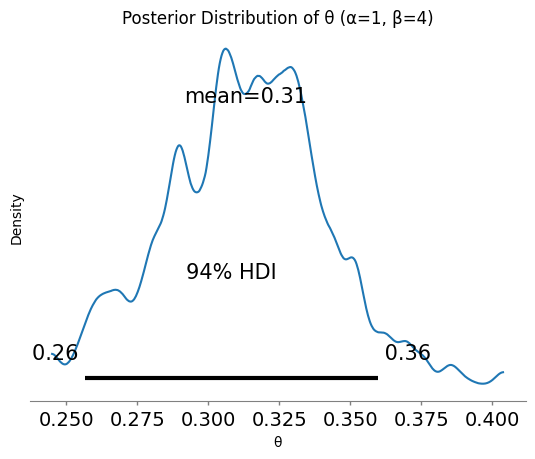

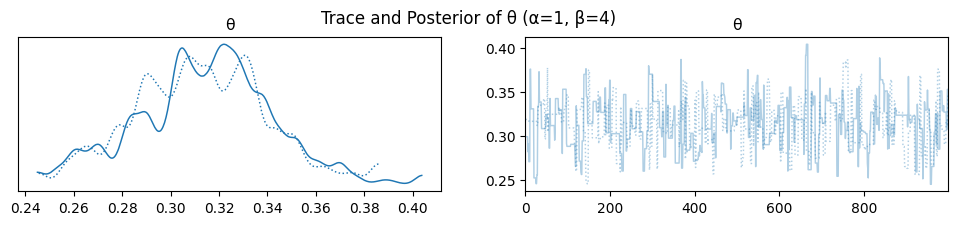

In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Given data
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

# Prior parameters
beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 2000)

for α, β in beta_params:
    # Define the model and sample
    with pm.Model() as model:
        θ = pm.Beta('θ', alpha=α, beta=β)
        y = pm.Binomial('y', n=n_trials, p=θ, observed=n_heads)
        idata = pm.sample(1000, step=pm.Metropolis(), random_seed=4591, return_inferencedata=True)

    # Plot posterior distribution
    az.plot_posterior(idata, var_names=['θ'])
    plt.title(f'Posterior Distribution of θ (α={α}, β={β})')
    plt.xlabel('θ')
    plt.ylabel('Density')
    plt.show()

    # Plot trace of the samples
    az.plot_trace(idata, var_names=['θ'])
    plt.suptitle(f'Trace and Posterior of θ (α={α}, β={β})', y=1.02)
    plt.show()